# BAYESIAN REGRESSION

In [224]:
# Import some stuff
import numpy as np 
from scipy.special import erf
import numpy.random as rn
import matplotlib
import matplotlib.pyplot as plt
from code.plot_utils import plot_pretty
%matplotlib inline  
%pylab inline 
rcParams['font.family'] = 'serif'



from scipy import stats
import seaborn as sns
import pandas as pd
plot_pretty()

Populating the interactive namespace from numpy and matplotlib


//anaconda/envs/python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['step']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [225]:
x_a = np.array([-1.3,-0.72,0.1,0.63,1.50,1.95,3.20,3.76,4.12,4.68])
y_a = np.array([0.62,1.85,4.39,5.31,7.58, 9.13,12.38,14.57,15.10,17.08])
sigma_y = np.array([0.20,0.30,0.25,0.35,0.15,0.17,0.25,0.38,0.22,0.40])

## Plot data $y$ vs $x$

To get a sense of the data and a rough understanding of the expected values for the parameters $a$, $b$ and $c$, I plot $y$ versus $x$.

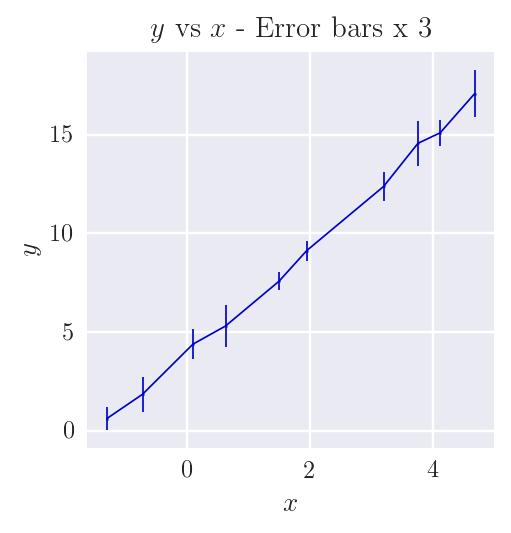

In [226]:
plt.figure(figsize = (3.0,3.0))

plt.errorbar(x_a,y_a, 3*sigma_y, color='mediumblue', linewidth = 0.7)
plt.scatter(x_a,y_a, s= 0.8)

plt.title('$y$ vs $x$ - Error bars x 3')
plt.xlabel('$x$');plt.ylabel('$y$')
plt.show()

We will adopt a model of the form:

\begin{equation}
y = a + bx + cx^2
\end{equation}

And try to determine the values of the parameters of the model

## Exploration of the posterior function

Assuming unoform prior, the posterior function (using $N$ points) is:

\begin{equation}
L = \prod_i^N f_i, \quad N = 1, \dots, 10,
\end{equation}

where the likelihood is given by:
\begin{equation}
f_i  =\mbox{exp}\left[-\frac{(y_i - a - bx_i - cx_i^2)^2}{2\sigma_i^2} \right]
\end{equation}

Assuming that the data poins are not correlated.

In [227]:
# Define the single point likelihood function

def likelihood(x,y,sig_y,a,b,c):
    """
    Function that calculates the likelihood
    given one data point.
    Inputs:
    - 
    """
    model = a + b*x + c*(x**2.0)
    chi_sq = -0.5*((y - model)**2.0)/sig_y**2.0
    
    return np.exp(chi_sq)

In [228]:
a = np.linspace(3.0,4.5,200)
b = np.linspace(2.0,3.0,200)
c = np.linspace(-0.1,0.2,200)
# Define a function that calculates the full 3D likelihood function, using n points

def posterior(n, size):
    """
    Returns posterior function
    Using n points - Use the first n data points
    This is the full 3D posterior function
    - N: number of data points used
    - size: size of the matrix
    """
    post = np.ones([size,size,size])
    
    # Get the first n data points
    x_p = x_a[0:n]
    y_p = y_a[0:n]
    sig_p = sigma_y[0:n]


    for i in range(size):
        a_loc = a[i]
        for j in range(size):
            b_loc = b[j]
            for k in range(size):
                c_loc = c[k]
                
                like_prod = 1.0
                for q in range(n):
                    x_loc = x_p[q]
                    y_loc = y_p[q]
                    sig_loc = sig_p[q]
                    
                    post[i,j,k] = post[i,j,k]*likelihood(x_loc, y_loc, sig_loc, a_loc, b_loc, c_loc)
            
    return post      


In [229]:
posterior_3D_1pt = posterior(1, 200)
posterior_3D_2pt = posterior(2,200)
posterior_3D_10pt = posterior(10, 200)

In [230]:
#Marginalize now

#Using one point
post_ab_1pt = np.sum(posterior_3D_1pt, axis = 2)
post_ac_1pt = np.sum(posterior_3D_1pt, axis = 1)
post_bc_1pt = np.sum(posterior_3D_1pt, axis = 0)

#Using two points
post_ab_2pt = np.sum(posterior_3D_2pt, axis = 2)
post_ac_2pt = np.sum(posterior_3D_2pt, axis = 1)
post_bc_2pt = np.sum(posterior_3D_2pt, axis = 0)

#Using ten points
post_ab_10pt = np.sum(posterior_3D_10pt, axis = 2)
post_ac_10pt = np.sum(posterior_3D_10pt, axis = 1)
post_bc_10pt = np.sum(posterior_3D_10pt, axis = 0)

## Plot the marginalized posteriors

Let's plot now the marginalized posteriors, for the set of parameters $a - b$, $a - c$, $b - c$. We marginalize over the third parameter each time.

### Using 1 data point

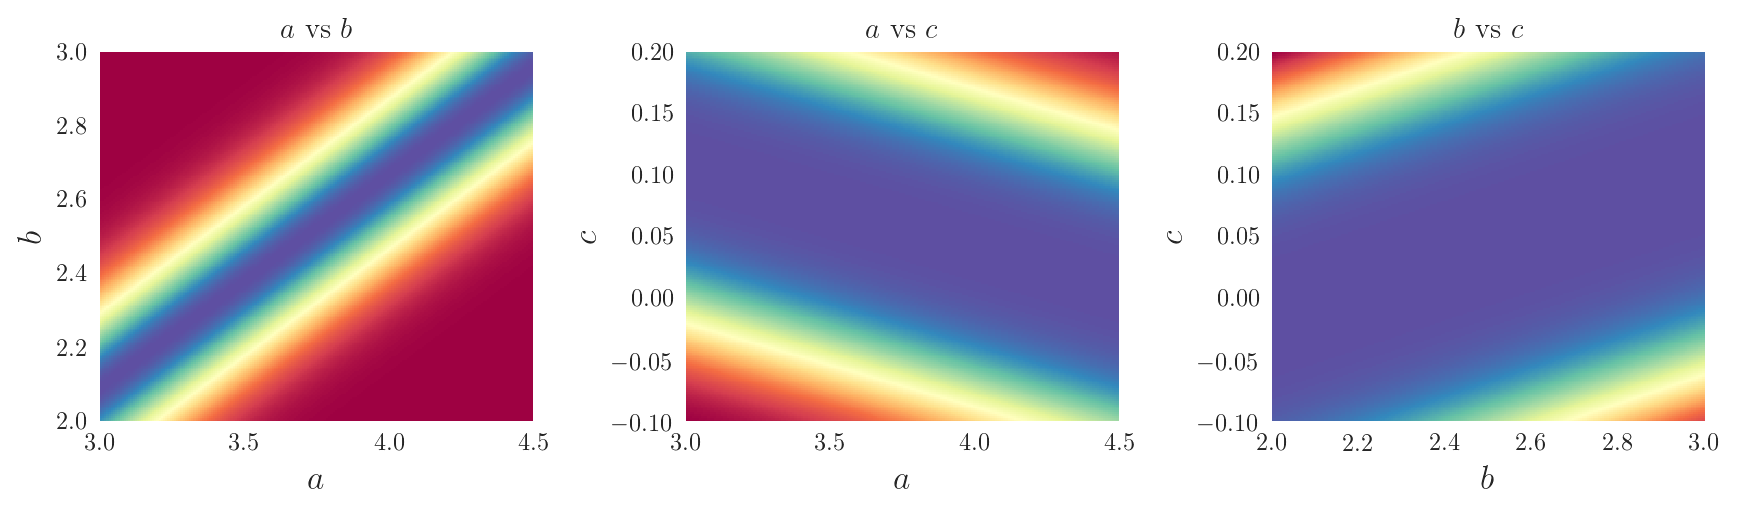

In [231]:
fig, ax = plt.subplots(1, 3, figsize = (10,3))

ax[0].pcolormesh(a, b, post_ab_1pt, cmap='Spectral')
ax[0].set_xlabel('$a$',fontsize=14);ax[0].set_ylabel('$b$',fontsize=14)
ax[0].set_title('$a$ vs $b$')

ax[1].pcolormesh(a, c, post_ac_1pt, cmap='Spectral')
ax[1].set_xlabel('$a$',fontsize=14);ax[1].set_ylabel('$c$',fontsize=14)
ax[1].set_title('$a$ vs $c$')

ax[2].pcolormesh(b, c, post_bc_1pt, cmap='Spectral')
ax[2].set_xlabel('$b$',fontsize=14);ax[2].set_ylabel('$c$',fontsize=14)
ax[2].set_title('$b$ vs $c$')

#plt.title('Posterior - Using 1 data point')

plt.tight_layout()
plt.show()

### Using 2 data points

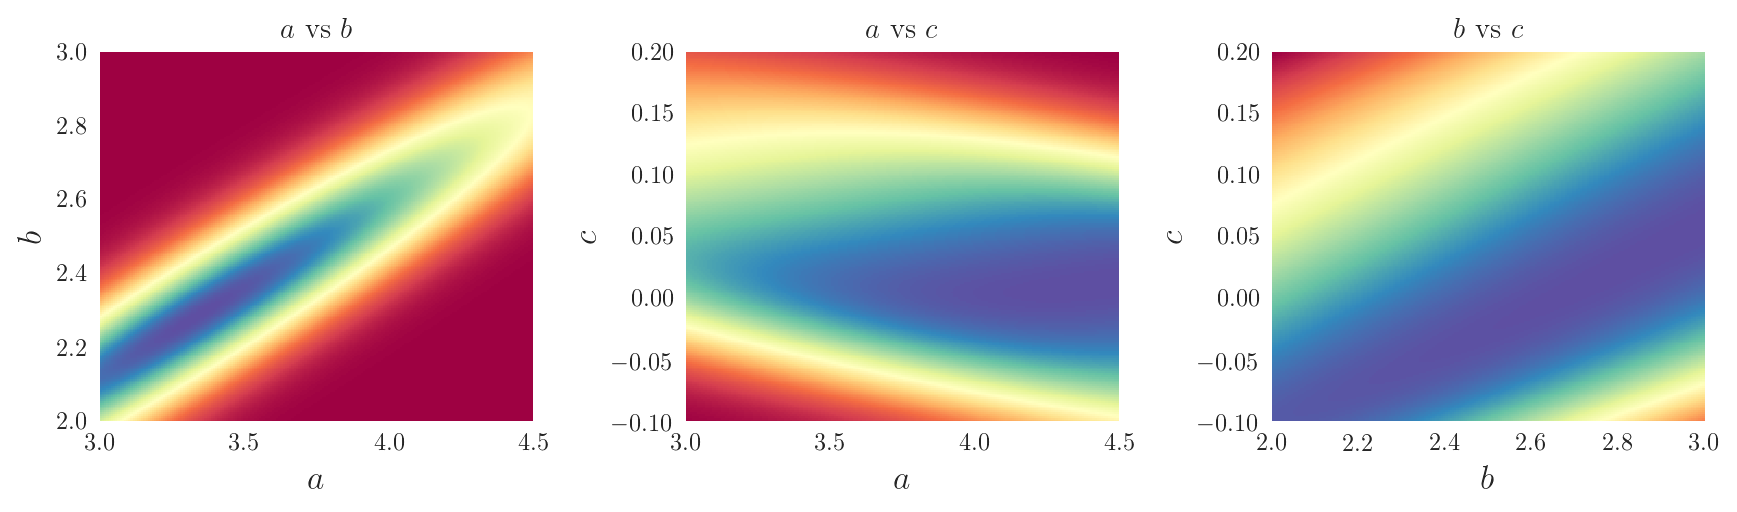

In [232]:
fig, ax = plt.subplots(1, 3, figsize = (10,3))

ax[0].pcolormesh(a, b, post_ab_2pt, cmap='Spectral')
ax[0].set_xlabel('$a$',fontsize=14);ax[0].set_ylabel('$b$',fontsize=14)
ax[0].set_title('$a$ vs $b$')

ax[1].pcolormesh(a, c, post_ac_2pt, cmap='Spectral')
ax[1].set_xlabel('$a$',fontsize=14);ax[1].set_ylabel('$c$',fontsize=14)
ax[1].set_title('$a$ vs $c$')

ax[2].pcolormesh(b, c, post_bc_2pt, cmap='Spectral')
ax[2].set_xlabel('$b$',fontsize=14);ax[2].set_ylabel('$c$',fontsize=14)
ax[2].set_title('$b$ vs $c$')

plt.tight_layout()
plt.show()

### Using 3 data points

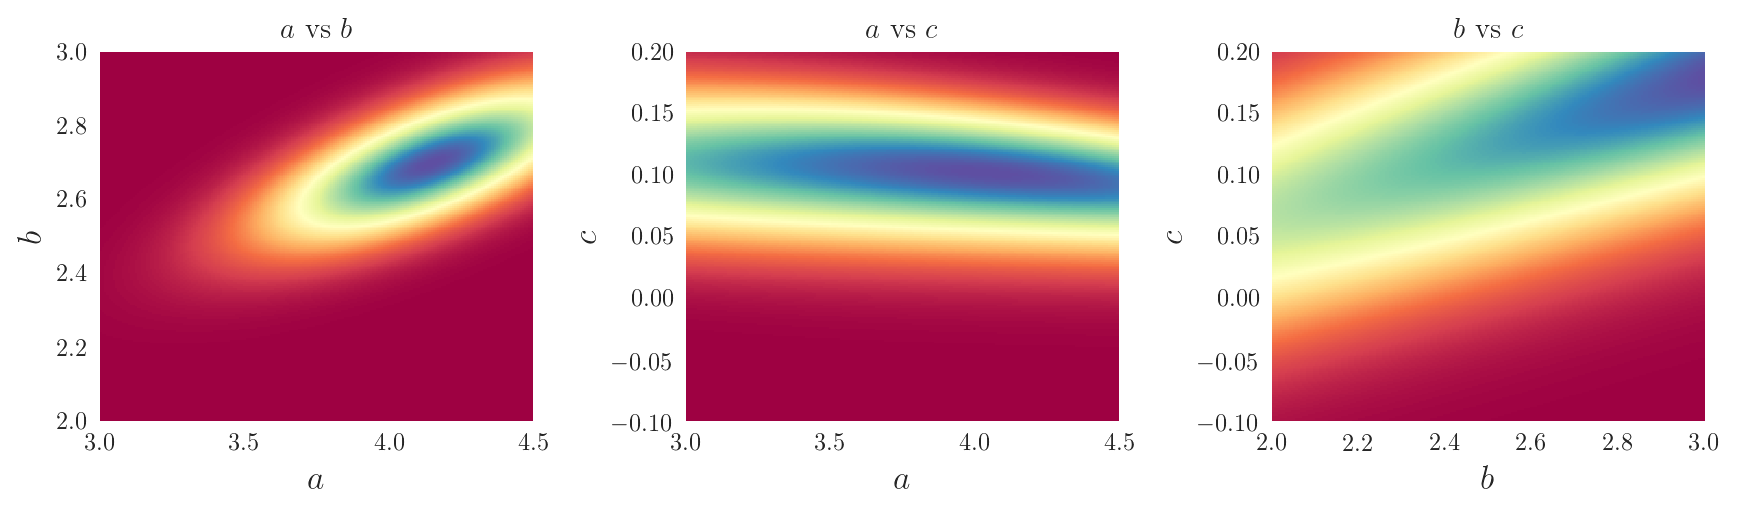

In [233]:
posterior_3D_3pt = posterior(3,200)

#marginalized posterior 
post_ab_3pt = np.sum(posterior_3D_3pt, axis = 2)
post_ac_3pt = np.sum(posterior_3D_3pt, axis = 1)
post_bc_3pt = np.sum(posterior_3D_3pt, axis = 0)

fig, ax = plt.subplots(1, 3, figsize = (10,3))

ax[0].pcolormesh(a, b, post_ab_3pt, cmap='Spectral')
ax[0].set_xlabel('$a$',fontsize=14);ax[0].set_ylabel('$b$',fontsize=14)
ax[0].set_title('$a$ vs $b$')

ax[1].pcolormesh(a, c, post_ac_3pt, cmap='Spectral')
ax[1].set_xlabel('$a$',fontsize=14);ax[1].set_ylabel('$c$',fontsize=14)
ax[1].set_title('$a$ vs $c$')

ax[2].pcolormesh(b, c, post_bc_3pt, cmap='Spectral')
ax[2].set_xlabel('$b$',fontsize=14);ax[2].set_ylabel('$c$',fontsize=14)
ax[2].set_title('$b$ vs $c$')

#plt.title('Posterior - Using 3 data points')

plt.tight_layout()
plt.show()

### Using all 10 data points

Also I zoom in a little bit here, to see better the posterior

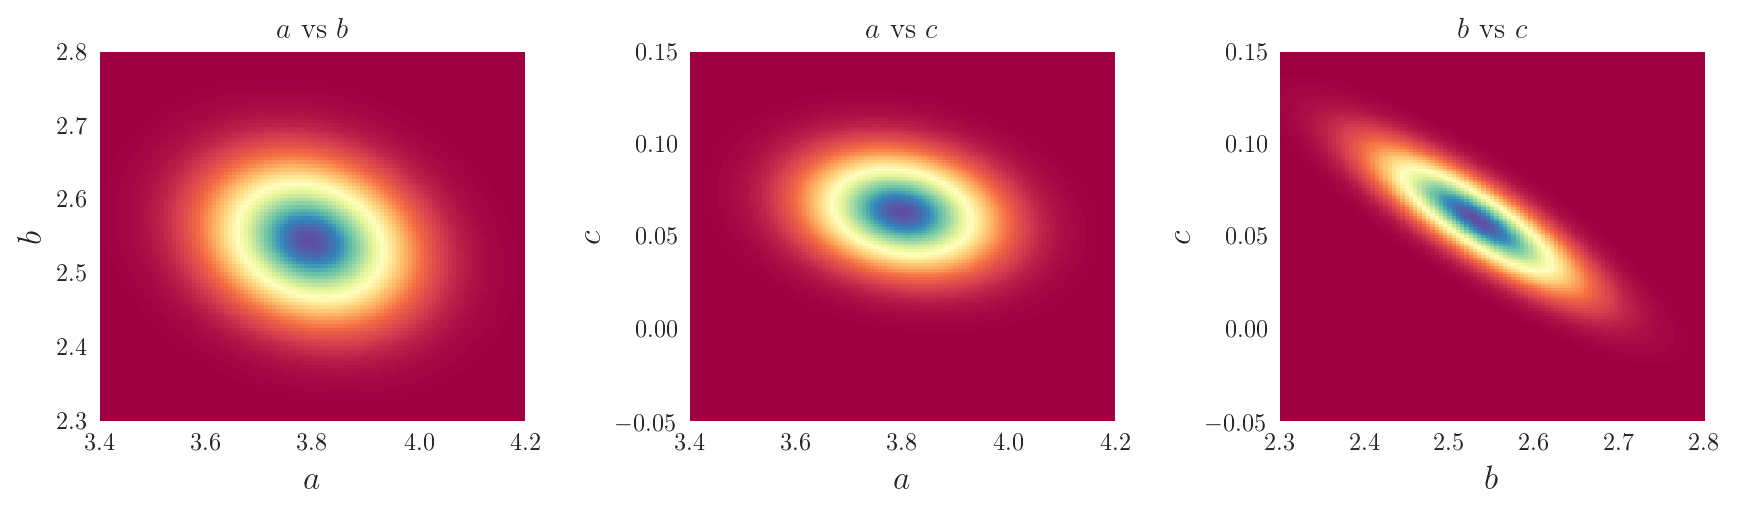

In [234]:
fig, ax = plt.subplots(1, 3, figsize = (10,3))

ax[0].pcolormesh(a, b, post_ab_10pt, cmap='Spectral')
ax[0].set_xlabel('$a$',fontsize=14);ax[0].set_ylabel('$b$',fontsize=14)
ax[0].set_title('$a$ vs $b$')
ax[0].set_xlim(3.4,4.2);ax[0].set_ylim(2.3,2.8)

ax[1].pcolormesh(a, c, post_ac_10pt, cmap='Spectral')
ax[1].set_xlabel('$a$',fontsize=14);ax[1].set_ylabel('$c$',fontsize=14)
ax[1].set_title('$a$ vs $c$')
ax[1].set_xlim(3.4,4.2);ax[1].set_ylim(-0.05,0.15)

ax[2].pcolormesh(b, c, post_bc_10pt, cmap='Spectral')
ax[2].set_xlabel('$b$',fontsize=14);ax[2].set_ylabel('$c$',fontsize=14)
ax[2].set_title('$b$ vs $c$')
ax[2].set_xlim(2.3,2.8);ax[2].set_ylim(-0.05,0.15)

plt.tight_layout()
plt.show()

## Posterior distribution, best fit values and confidence intervals for $a$, $b$, $c$.

Here we plot the posterior distribution of the parameters $a$, $b$ and $c$ (marginalizing over the other two parameters each time) and and find the best fit values and their errors:

\begin{equation}
\hat{a} \pm \sigma_a, \quad \hat{b} \pm \sigma_b, \quad \hat{c} \pm \sigma_c 
\end{equation}

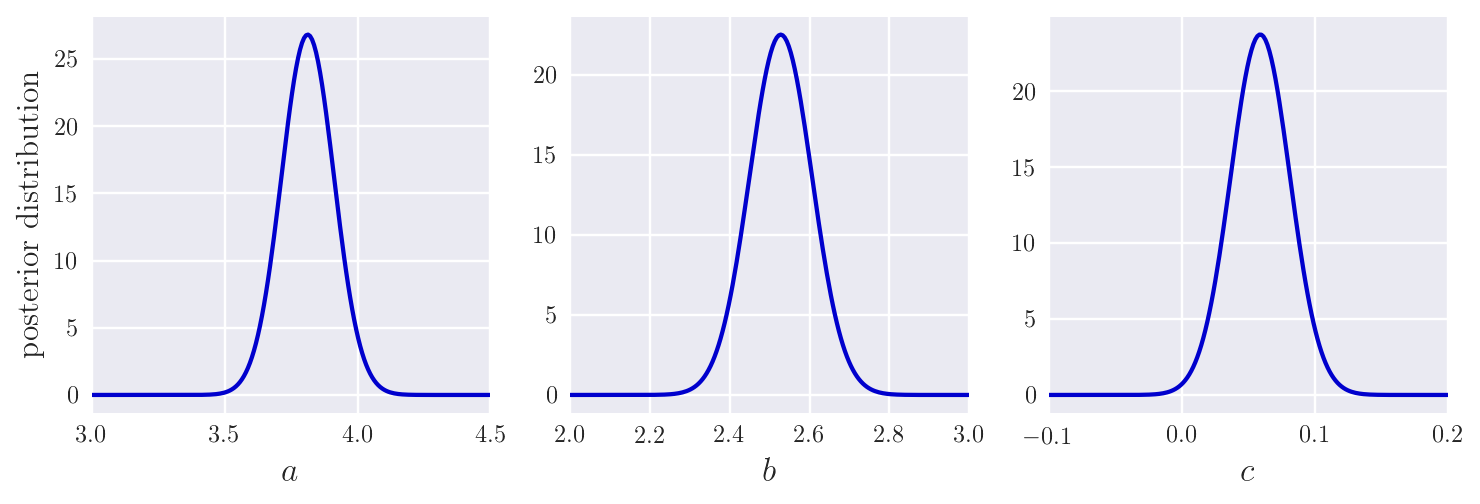

In [235]:
post_a = np.sum(post_ab_10pt, axis=1)
post_b = np.sum(post_ab_10pt, axis=0)
post_c = np.sum(post_bc_10pt, axis=0)

fig, ax = plt.subplots(1, 3, figsize = (10,3))

ax[0].plot(a, post_a, c='mediumblue')
ax[0].set_xlabel('$a$', fontsize=14);ax[0].set_ylabel('posterior distribution', fontsize=13)
ax[0].set_xlim(3.0,4.5)

ax[1].plot(b, post_b, c='mediumblue')
ax[1].set_xlabel('$b$', fontsize=14)
ax[1].set_xlim(2.0,3.0)

ax[2].plot(c, post_c, c='mediumblue')
ax[2].set_xlabel('$c$', fontsize=14)
ax[2].set_xlim(-0.1,0.2)

plt.show()

Calculate the moments (mean and standard deviation now)

In [236]:
mean_a = np.sum(a*post_a)/np.sum(post_a)
sig_a =  np.sqrt(np.abs(np.sum((a-mean_a)**2*post_a)/np.sum(post_a)))

mean_b = np.sum(b*post_b)/np.sum(post_b)
sig_b =  np.sqrt(np.abs(np.sum((b-mean_b)**2*post_b)/np.sum(post_b)))

mean_c = np.sum(c*post_c)/np.sum(post_c)
sig_c =  np.sqrt(np.abs(np.sum((c-mean_c)**2*post_c)/np.sum(post_c)))
print('Mean a and sigma_a')
print(mean_a);print(sig_a)

print('Mean b and sigma_b')
print(mean_b);print(sig_b)

print('Mean c and sigma_c')
print(mean_c);print(sig_c)

Mean a and sigma_a
3.8127341339098466
0.09873006648859516
Mean b and sigma_b
2.527745810570102
0.07836297788516071
Mean c and sigma_c
0.0589571221276329
0.022302263199880993


So, we now have that:

\begin{equation}
a = 3.8 \pm 0.1, \quad b = 2.53 \pm 0.08, \quad c = 0.058 \pm 0.022
\end{equation}

(For more significant figures, check above)

## Calculation of the parameter covariance matrix from the posterior


We will try to calculate the covariance matrix of the parameters, $C_{param}(a, b, c)$ using the posterior function $L(a, b, c)$ we calculated above.

In the discrete case, we will have, for example:
\begin{equation}
\mbox{Cov}(a,b) = \frac{\sum_a \sum_b \sum_c (a - \hat{a})(b-\hat{b}) L(a,b,c)}{\sum_a \sum_b \sum_c L(a,b,c)}
\end{equation}

And similarly for the rest.

It is very easy to do it using matrix notation, for example:

\begin{equation}
\mbox{Cov}(a,b) = [a -\hat{a}]^T \tilde{L}_{ab} [b - \hat{b}]
\end{equation}

Where $[a -\hat{a}]$ and $[b - \hat{b}]$ are vectors and $\tilde{L}_{ab}$ is the marginalized (over $c$) posterior matrix for the parameters $a$ and $b$.

In [237]:
cov_ab = np.dot((a-mean_a),np.matmul(post_ab_10pt,(b-mean_b)))/np.sum(post_ab_10pt) 
cov_ac = np.dot((a-mean_a),np.matmul(post_ac_10pt,(c-mean_c)))/np.sum(post_ac_10pt)
cov_bc = np.dot((b-mean_b),np.matmul(post_bc_10pt,(c-mean_c)))/np.sum(post_bc_10pt)

print(cov_ab, cov_ac, cov_bc)

(-0.0013860906745314125, -0.0004253489343230759, -0.0014829441276255175)


So, the covariances are: 

\begin{equation}
\mbox{Cov}(a,b) = -0.001386, \quad \mbox{Cov}(a,c) = -0.000425,\quad \mbox{Cov}(b,c) = -0.00148
\end{equation}

And of course, to get the other covariances we simply use the fact that the covariance matrix is symmetric $\mbox{Cov}(a,b) = \mbox{Cov}(b,a)$.

Let's make a heatmap to see it better.

In [238]:
#Define the covariance matrix
Cov_mat = np.zeros([3,3])
#Diagonal terms
Cov_mat[0,0] = sig_a**2.0;Cov_mat[1,1]=sig_b**2.0;Cov_mat[2,2]=sig_c**2.0

#Non-diagonal terms
Cov_mat[0,1] = Cov_mat[1,0] = cov_ab
Cov_mat[0,2] = Cov_mat[2,0] = cov_ac
Cov_mat[1,2] = Cov_mat[2,1] = cov_bc

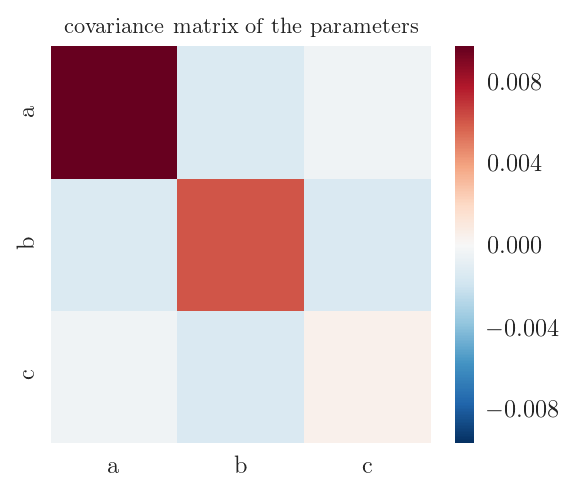

In [239]:
plot_pretty()

fig = plt.figure(figsize=(3.5,3))

sns.heatmap(Cov_mat)

x_0 = [0.5,1.5,2.5]
y_0 = [2.5,1.5,0.5]
labels = ['a', 'b', 'c']


# ... and label them with the respective list entries
plt.xticks(x_0,labels)
plt.yticks(y_0,labels)

plt.title('covariance matrix of the parameters', fontsize = 9)

plt.show()

## Calculation of the Fisher Matrix

We calculate the Fisher Matrix, using the formula:

\begin{equation}
F_{ij} = \frac{\partial \vec{\mu}^T}{\partial {\theta_i}}C^{-1}_{data} \frac{\partial \vec{\mu}}{\partial \theta_j}
\end{equation}

Where $\mu_i = y_i - [a + bx_i +cx_i^2]$. In our case, of course $\vec{\theta} = [a,b,c]$. The data covariance matrix is diagonal $C_{data} = \mbox{diag}(\sigma_y^2)$.

From the above, we have:

\begin{equation}
\frac{\partial  \vec{\mu}}{\partial a} = \vec{1},  \quad \frac{\partial \vec{\mu}}{\partial b} = \vec{x}, \quad \frac{\partial \vec{\mu}}{\partial c} = \vec{x}^2
\end{equation}

Also, again, notice that the Fisher matrix is symmetric:

\begin{equation}
F_{ij} = F_{ji}
\end{equation}

In [240]:
# Define the data covariance matrix

#cov_data =


### Calculation of Uncertainty on $y$ and plot

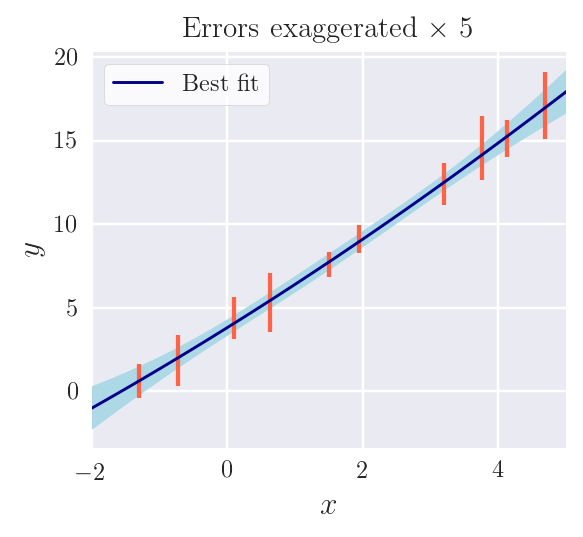

In [241]:
x_lin = np.linspace(-2.0, 5.0, 100)
#Best fit
y_fit = mean_a + mean_b*x_lin + mean_c*(x_lin**2.0)

#Error 
sig_y = np.zeros(100)
for i in range (100):
    x_vec = np.array([1,x_lin[i],x_lin[i]**2.0])
    sig_sq = np.dot(x_vec, np.matmul(Cov_mat,x_vec))
    sig_y[i] = np.sqrt(sig_sq)


fig = plt.figure(figsize = (3.5,3.0))
plt.plot(x_lin,y_fit, c= 'darkblue', linewidth=1.2, label='Best fit')
plt.fill_between(x_lin, y_fit-5*sig_y, y_fit+5*sig_y, facecolor='lightblue')
plt.errorbar(x_a,y_a, 5*sigma_y, fmt='none', ecolor='tomato')

plt.title(R'Errors exaggerated $\times$ 5')
plt.xlabel('$x$', fontsize=13);plt.ylabel('$y$', fontsize=13)
plt.legend(frameon=True, loc='upper left', fontsize=10, facecolor='w')
plt.xlim(-2.0,5.0)
plt.show()

## Posterior Exploration using MCMC

Here we explore the posterior distribution, using the MCMC method to dample it. We use the Metropolis-Hastings algorithm.

In [261]:
# Definition of the MCMC explorer

def MCMC(n, x_0, step, modelpdf, *args):
    """
    a simple single chain  MCMC Metropolis-Hastings sampler
    with step proposal distribution of U(-step,step)
    n - integer
        number of MCMC steps (iterations) to take
    x0 - float
        initial x value
    step - float
        step size controlling step proposal distribution
    modelpdf - python function object
        ln(pdf) where pdf is the target pdf to sample
    args - pointer to a list
        list of arguments to pass modelpdf
        
    Returns:
    ---------
    xchain - list
        list of x values in the MCMC chains
    """
    
    x=x_0 #Initial value(s) for the walker to start
    npars = np.size(x_0) #This gives us the dimensions of the problem
    xchain = [] #Create empty array
    xchain.append(x) #Initialize
    
    nsample = 0 #Steps taken by the sampler
    
    while (nsample < n):
        delta = rn.uniform(-step, step, npars)
        xtry = x + delta #trial step 
        # Calculate the value of the pdf in the old and the new point
        pxtry = modelpdf(xtry, *args); px = modelpdf(x, *args)
        
        if (pxtry > px): #In that case accepts always the proposed step
            x = xtry
            xchain.append(x)
        else:
            aprob = pxtry - px
            # Draw a random number in the [0,1) range
            u = rn.uniform(0.0,1.0)
            
            if (u < np.exp(aprob)):
                x = xtry
                xchain.append(x)
            else:
                xchain.append(x)
        
        nsample +=1
        
    return np.array(xchain)

In [262]:
# Define here the posterior to be sampled - Using all ten points directly
# Atually we define the log posterior
def log_likelihood(x_l, y_l, sig_l, a, b, c):
    """
    Function that calculates the log likelihood
    given one data point.
    Inputs:
    - 
    """
    model = a + b*x_l + c*(x_l**2.0)
    chi_sq = -0.5*((y_l - model)**2.0)/sig_l**2.0
    
    return chi_sq
# =================================================
# =================================================
def post_sampled(x):
    """
    Posterior distribution - to be sampled
    Actually for computational efficieny, this 
    contains the log of the posterior
    
    x contains the three parameters of the model:
    a, b, c
    ----------------------------------------
    Returns:
    The value of the posterior for specific values
    of a, b, c
    """
    a = x[0]; b = x[1]; c = x[2]
    
    post = 0.0
    for i in range(10):
        x_loc = x_a[i]
        y_loc = y_a[i]
        sig_loc = sigma_y[i]
        
        post += log_likelihood(x_loc, y_loc, sig_loc, a, b, c)
        
    return post

In [268]:
from chainconsumer import ChainConsumer

n = 1e6
x_0 = [4.0, 3.0, 0.1]
step = 0.1

chain_res = MCMC(n, x_0, step, post_sampled)

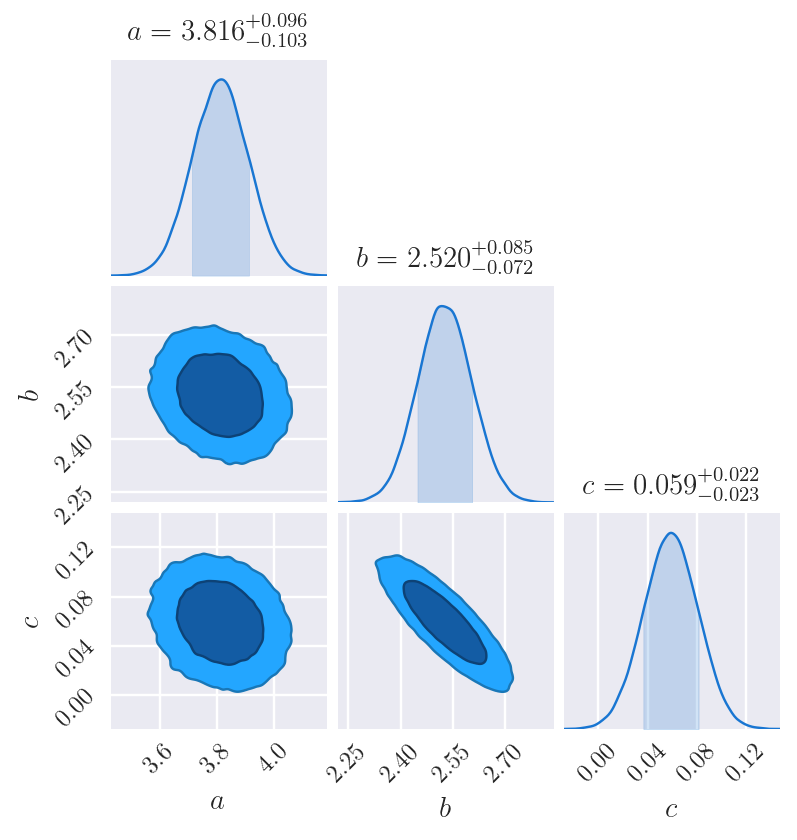

In [269]:
c = ChainConsumer()
c.add_chain(chain_res, parameters=["$a$", "$b$", "$c$"])
fig = c.plotter.plot()